## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sfm
import statsmodels.api as sm
%matplotlib inline

plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')


## Obtaining data

In [2]:
# reading in the data and previewing the dataframe
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Preparation

In this section, we shall be preparing the data for further processing and modelling

### Investigate data types

In [3]:
# summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  



We conclude that
- `date` column should be changed to `DateTime`.
- `sqft_basement` column should be changed to `float`
- `waterfront`, `view`, `condition`, and `grade` will remain unchanged for now because they contain text

In [4]:
# function to change data type to datetime
def change_to_datetime(df, col):
    ''' Changes column to DateTime object'''
    df[col] = pd.to_datetime(df[col])
    return df.info()


In [5]:
# changing date column type to DateTime
change_to_datetime(df, 'date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [6]:
# checking column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# function to check null values
def check_null(df):
    return df.isna().sum()

In [8]:
# checking for null values in the data
check_null(df)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are missing values in three columns.<br>
Depending on the ratio of missing values, we will decide on what approach to take in dealing with them

In [9]:
# function to calculate percentage of null values
def miss_percent(df,col):
    miss = ((df[col].isna().sum()) / len(df[col])) * 100
    return print(f'There is {miss} percent of values missing in {col}.')

In [10]:
# checking percentage of missing values in waterfront
miss_percent(df,'waterfront')
miss_percent(df, 'view')
miss_percent(df, 'yr_renovated')

There is 11.00152798999861 percent of values missing in waterfront.
There is 0.29170718155299347 percent of values missing in view.
There is 17.78950780200954 percent of values missing in yr_renovated.


#### Dealing with `yr_renovated`

In [11]:
# investigating yr_renovated
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

We notice that `0` is the most common in this column thus we replace the null with `0`.

In [12]:
# function to replace null with a specificied value
def replace_nan(df,col, replace_value):
    return df[col].fillna(replace_value, inplace=True)

In [13]:
# replacing the null 
replace_nan(df,'yr_renovated',0)

In [14]:
# confirming null values are removed
miss_percent(df, 'yr_renovated')

There is 0.0 percent of values missing in yr_renovated.


#### Dealing with `waterfront`

In [15]:
# investigating the column
print(f'Unique values:{df.waterfront.unique()}')
print(f'Count:{df.waterfront.value_counts()}')

Unique values:[nan 'NO' 'YES']
Count:NO     19075
YES      146
Name: waterfront, dtype: int64


`NO` occurs the highest number of times hence we change the `null` to `NO`

In [16]:
#replacing the null values with zero
replace_nan(df,'waterfront', 'NO')

In [17]:
# function to replace a value with another
def substitute(df,col,original_value, sub_value):
    return df[col].replace(original_value, sub_value, inplace=True)

In [18]:
# changing YES to  1
substitute(df,'waterfront','YES',1)

# changing NO to  0
substitute(df, 'waterfront', 'NO', 0)

In [19]:
# confirming null values are out
miss_percent(df, 'waterfront')

There is 0.0 percent of values missing in waterfront.


#### Dealing with `view`

In [20]:
# investigating the column
print(f'Unique values:{df.view.unique()}')
print(f'Count:{df.view.value_counts()}')

Unique values:['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
Count:NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In `view`, we have five types of rating.<br>
`NONE` has the most entries and we decide to replace `null` with it.

In [21]:
#replacing the null values with NONE
replace_nan(df,'view', 'NONE')

In [22]:
# changing the ratings to numbers
substitute(df,'view',['NONE','FAIR','AVERAGE','GOOD','EXCELLENT'],[0,1,2,3,4])


In [23]:
# checking count
df['view'].value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

#### Dealing with `sqft_basement`

In [24]:
# investigating the column
print(f'Count:{df.sqft_basement.value_counts()}')

Count:0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1548.0        1
2570.0        1
2390.0        1
2490.0        1
666.0         1
Name: sqft_basement, Length: 304, dtype: int64


The column has `?` as an entry. `0.0` is the most occuring and we change `?` to it.

In [25]:
# change ? to 0.0
substitute(df, 'sqft_basement', '?', 0.0)

In [26]:
df.sqft_basement = df.sqft_basement.astype(float)

In [27]:
print(f'Count:{df.sqft_basement.value_counts()}')

Count:0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64


#### Dealing with `condition`

In [28]:
# investigating the column
print(f'Unique values:{df.condition.unique()}')
print(f'Count:{df.condition.value_counts()}')

Unique values:['Average' 'Very Good' 'Good' 'Poor' 'Fair']
Count:Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64


There are 5 ratings and we decide to ssign them numbers on a scale of 1 to 5 with 5 being `very good`

In [29]:
# assigning the ratings numbers
substitute(df,'condition',['Poor','Fair','Average','Good','Very Good'],[1,2,3,4,5])

In [30]:
print(f'Unique values:{df.condition.unique()}')
print(f'Count:{df.condition.value_counts()}')

Unique values:[3 5 4 1 2]
Count:3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64


#### Dealing with `grade`

In [31]:
# investigating the column
print(f'Unique values:{df.grade.unique()}')
print(f'Count:{df.grade.value_counts()}')

Unique values:['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
Count:7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


We will assign the ratings as numbers with the numbers they have beside them. 

In [32]:
# assigning numbers to ratings
substitute(df,'grade',['7 Average','8 Good','9 Better','6 Low Average','10 Very Good','11 Excellent',
                      '5 Fair','12 Luxury','4 Low','13 Mansion','3 Poor'], [7,8,9,6,10,11,5,12,4,13,3])

In [33]:
print(f'Count:{df.grade.value_counts()}')

Count:7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64


#### Dealing with `bathrooms`

In [34]:
# investigating the column
#print(f'Unique values:{df.bathrooms.unique()}')
print(f'Count:{df.bathrooms.value_counts()}')

Count:2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


`bathrooms` have float values. We decide to round up to the next integer so as to have whole numbers.<br>
in this case, rounding off might make the `0.5` to be `0` which we don't want.

In [35]:
# rounding up the decimals
df['bathrooms'] = df['bathrooms'].apply(np.ceil).astype(int)


In [36]:
df.bathrooms.value_counts()

3    9362
2    6432
1    3926
4    1611
5     223
6      33
7       6
8       4
Name: bathrooms, dtype: int64

In [37]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,3,2570,7242,2.0,0,0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [38]:
df['yr_renovated'].fillna(df['yr_built'], inplace=True)

Date has dtype as object therefore we split month and date date to get discrete values

### Check duplicates

Checking whether we have any duplicates in our dataset.

In [39]:
#Function to identify duplicates
duplicates = []
def identify_duplicates(data):
    for i in data.duplicated():
        duplicates.append(i)
    duplicates_set = set(duplicates)
    if(len(duplicates_set) == 1):
        print('The data has no duplicates')
    else:
        duplicates_rows = 0
        for j in duplicates:
            if (j == True):
                duplicates_rows += 1
                #percentage of data represented by duplicates
                duplicates_percentage = np.round(((duplicates_rows/len(data)) * 100), 2)
                print(f'The data has {duplicates_rows} duplicated rows')
                print(f'Duplicated rows constitute of {duplicates_percentage}% of the dataframe')


In [40]:
identify_duplicates(df)

The data has no duplicates


### Checking for outliers

We view the distributions using histograms to get insight of the spread of the various features.

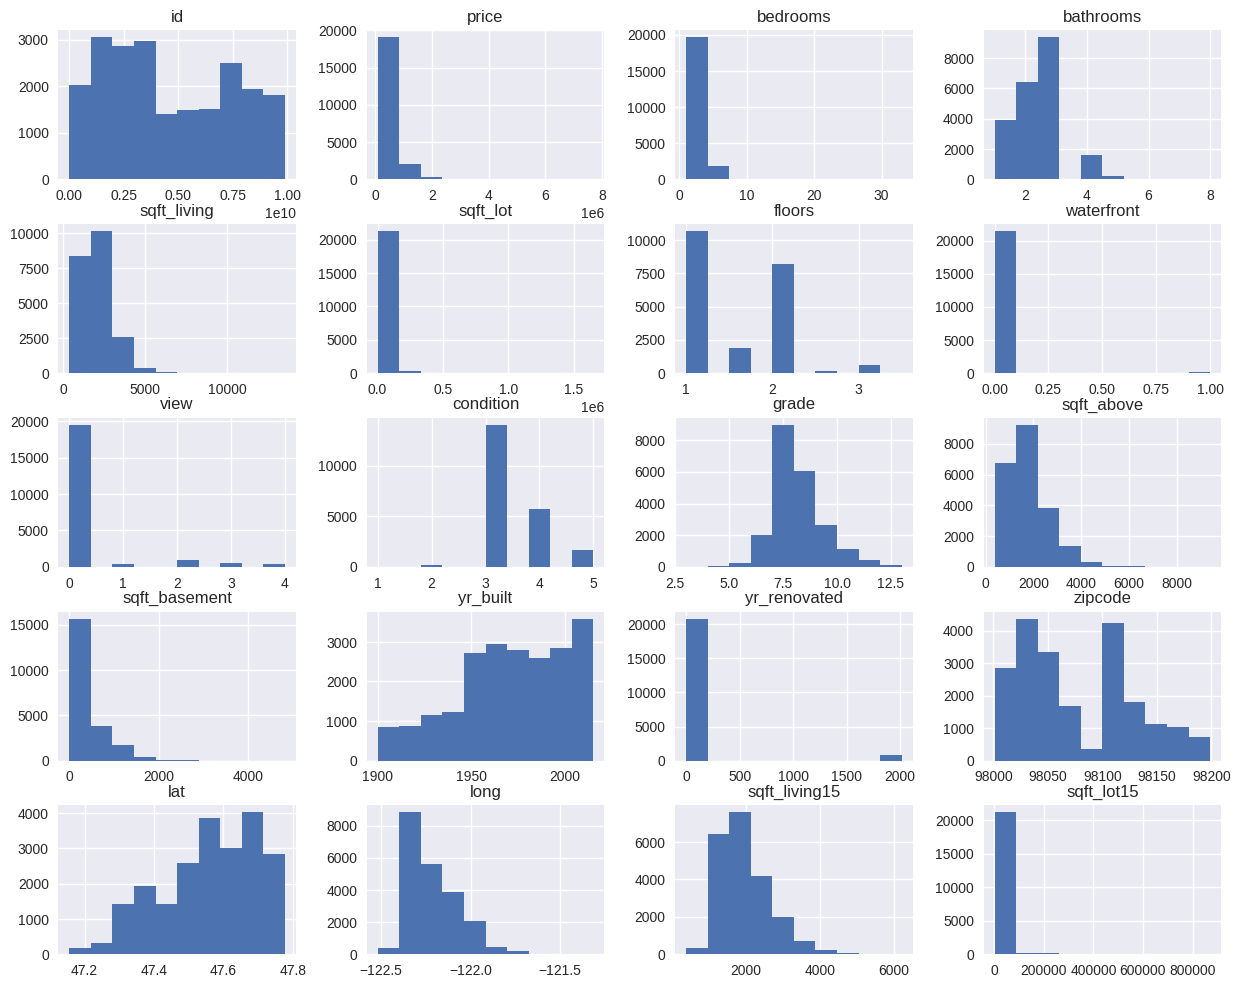

In [41]:
df.hist(figsize = (15,12))
plt.show()


- `grade`, `condition` and `floors` appear to be on a reasonable scale with no apparent outliers
- `waterfront`, `was_renovated_post90`, `viewed` and `has basement` are binary 1/0 features.
- We will consider potential outliers in `bedrooms`, `bathrooms` and the `sqft`-type features.

In [42]:
# Investigate bedrooms
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

There is a 33 bedroom house, we check on it.

In [43]:
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,2,1620,6000,1.0,0,0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


The house has `2` bathrooms and a price of `640,000`. This seem to indicate `33` might have been an error. We replace it with`3`

In [44]:
# Fix error for bedrooms
df.loc[15856, 'bedrooms'] = 3

While this could be an approach to removing outliers, we decide to use the interquartile ranges to generalise it.

In [45]:
def remove_outliers(df):
    # define the columns to remove outliers from
    cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
            'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
            'sqft_lot15']
    
    # remove outliers from the specified columns
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        df = df[(df[col] >= q1 - (2.5 * iqr * (len(df[col])/(len(df[col]) + 1)))) & (df[col] <= q3 + (2.5 * iqr * (len(df[col])/(len(df[col]) + 1))))]
    
    # return the modified DataFrame
    return df

In [46]:
df = remove_outliers(df)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18105 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             18105 non-null  int64         
 1   date           18105 non-null  datetime64[ns]
 2   price          18105 non-null  float64       
 3   bedrooms       18105 non-null  int64         
 4   bathrooms      18105 non-null  int64         
 5   sqft_living    18105 non-null  int64         
 6   sqft_lot       18105 non-null  int64         
 7   floors         18105 non-null  float64       
 8   waterfront     18105 non-null  int64         
 9   view           18105 non-null  int64         
 10  condition      18105 non-null  int64         
 11  grade          18105 non-null  int64         
 12  sqft_above     18105 non-null  int64         
 13  sqft_basement  18105 non-null  float64       
 14  yr_built       18105 non-null  int64         
 15  yr_renovated   1810

## EDA

### Price

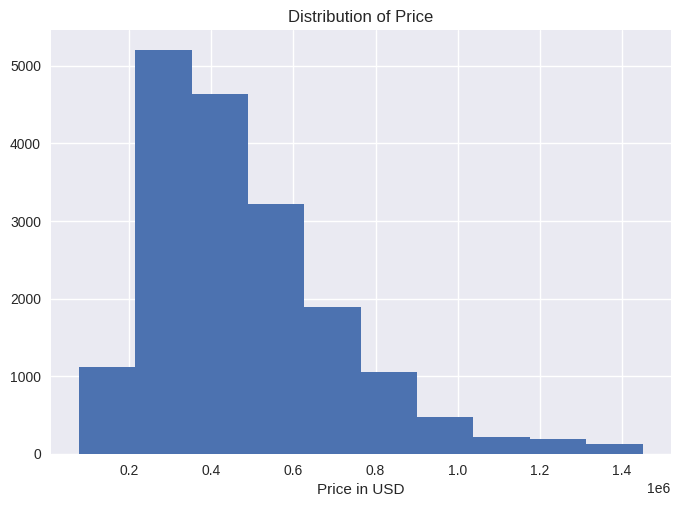

In [48]:
# View price distribution
df['price'].hist()
plt.xlabel('Price in USD')
plt.title('Distribution of Price')
plt.show()

### Waterfront

We explore how the `waterfront` feature influnces the price of a house.


In [49]:
df.waterfront.unique()

array([0, 1])

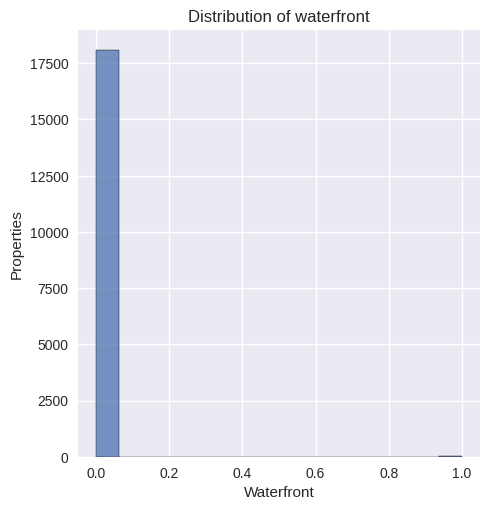

In [50]:
# Distribution of waterfront feature
sns.displot(data=df, x='waterfront')
plt.title('Distribution of waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Properties')
plt.show()

Majority of the properties do not have a waterfront

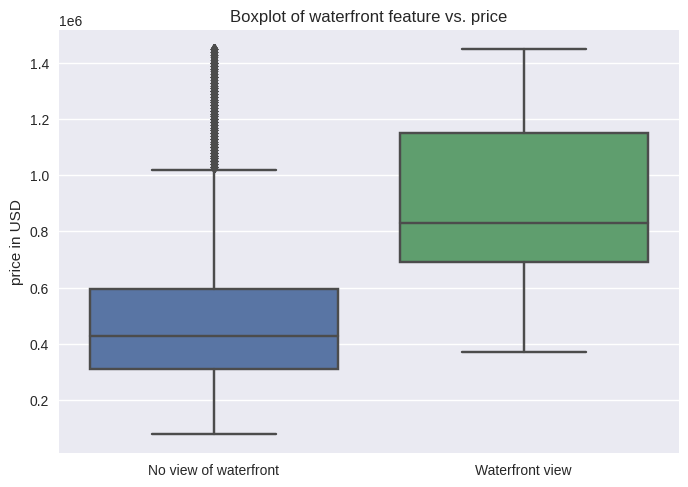

In [51]:
# Plot boxplot of waterfront feature
sns.boxplot(x = df['waterfront'], y = df['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('No view of waterfront', 'Waterfront view'))
plt.show()

In [52]:
waterfrontmean = df[df['waterfront'] == 1]['price'].mean()
nowaterfrontmean = df[df['waterfront'] == 0]['price'].mean()
print(f"The mean  price for a house with waterfront  is  {round(waterfrontmean,2)} USD")
print(f"The mean  price for a house without waterfront is  {round(nowaterfrontmean,2)} USD")
print(f"Percentage of houses with waterfront is: {len(df[df['waterfront'] == 1])/len(df)*100}")

The mean  price for a house with waterfront  is  870494.64 USD
The mean  price for a house without waterfront is  478716.95 USD
Percentage of houses with waterfront is: 0.15465341066003868


#### Conclusion


Waterfront has a significant effect on the price with the mean price of houses with waterfront being almost double of those without.
However only about 0.06% of houses have a waterfront.

### House features
These are the features that can be considered to be 'attached' to the house.

In [53]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

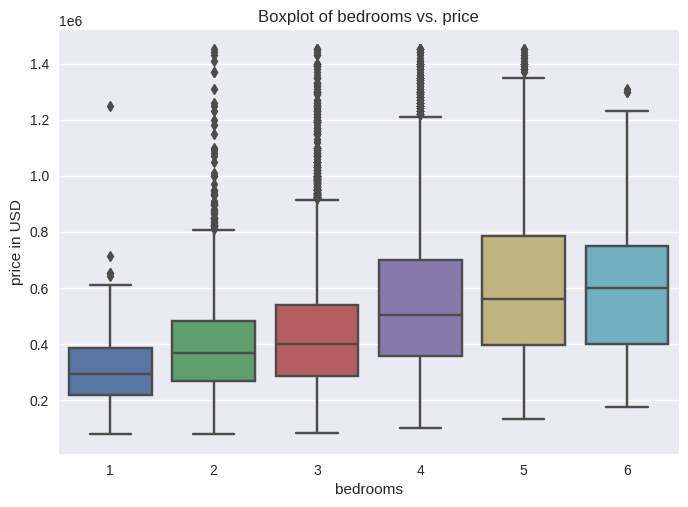

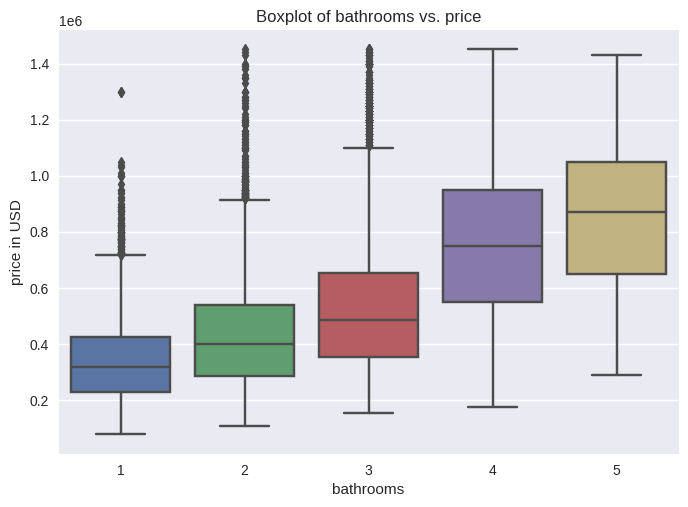

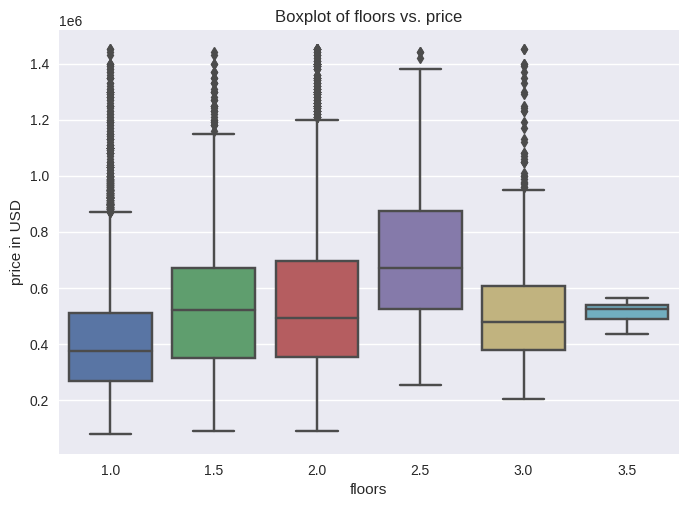

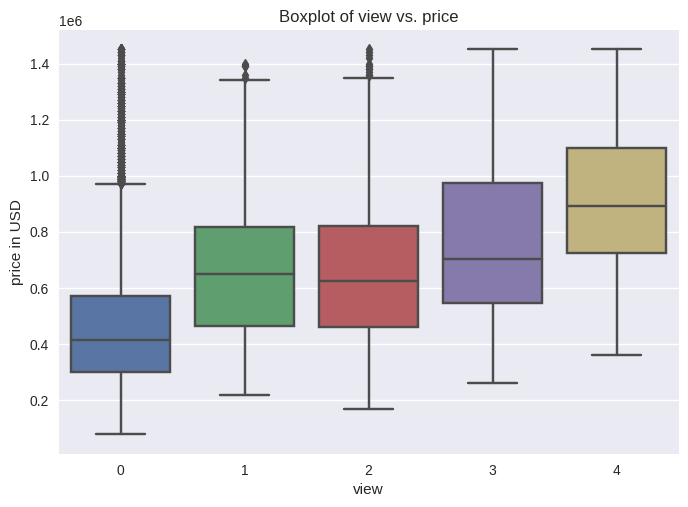

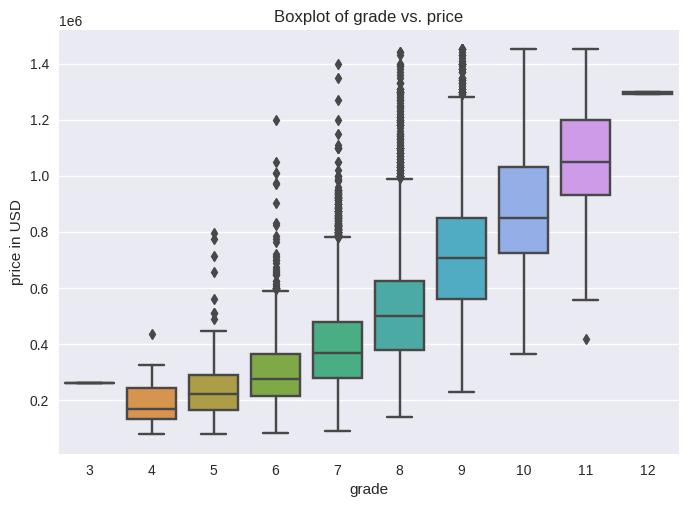

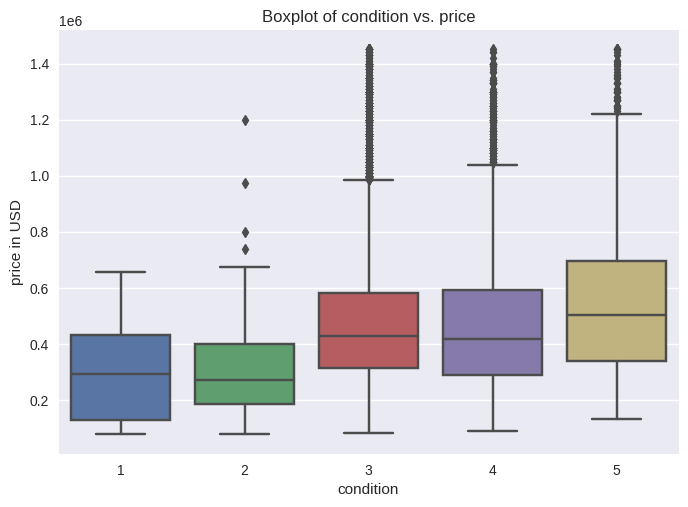

In [55]:
# Define categorical variables
features = ['bedrooms', 'bathrooms', 'floors', 'view', 'grade', 'condition']

# Plot boxplots
for feature in features:
    sns.boxplot(x = df[feature], y = df['price'])
    plt.title(f"Boxplot of {feature} vs. price")
    plt.ylabel("price in USD")
    plt.xlabel(f"{feature}")
    plt.show()

In [ ]:
X = df[['sqft_living']]
y = df['price']

In [ ]:

baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

In [ ]:
X_baseline = df.drop(['price'], axis=1)

In [ ]:
multiple_model = sm.OLS(y, sm.add_constant(X_baseline))
multiple_model_results = multiple_model.fit()
print(multiple_model_results.summary())